# Urban Sounds Classification
## Koç Holding Derin Öğrenme Bootcamp
### DLTR takımı projesi
### Model Hazırlanması ve Eğitimi

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import librosa
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns
import torch, gc
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models
from torchvision.utils import make_grid

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
PATH = "/content/drive/MyDrive/Deep Learning/"

In [3]:
X_train=pd.read_pickle(path + "X_train")
X_test=pd.read_pickle(path + "X_test")
X_val=pd.read_pickle(path + "X_validation")

y_train=pd.read_pickle(path + "y_train")
y_test=pd.read_pickle(path + "y_test")
y_val=pd.read_pickle(path + "y_validation")

In [4]:
X_train = np.array([np.array(val) for val in X_train])
X_test = np.array([np.array(val) for val in X_test])
X_val = np.array([np.array(val) for val in X_val])
y_train = np.array([np.array(val) for val in y_train])
y_test = np.array([np.array(val) for val in y_test])
y_val = np.array([np.array(val) for val in y_val])

### CNN modeli hazırlama

In [5]:
#Processing this model
model = Sequential()
model.add(Conv2D(32,
                    kernel_size = (3, 3),
                    strides = (1, 1),
                    padding = "same",
                    activation = "relu",
                    input_shape = (64, 64, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64,
                   kernel_size = (3, 3),
                   strides = (1, 1),
                   padding = "same",
                   activation = "LeakyReLU"))

model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(128,
                     kernel_size = (3, 3),
                     strides = (1, 1),
                     padding = "same",
                     activation = "LeakyReLU"))
model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 32768)             0

### Modeli veriyi kullanarak eğitme

In [8]:
training = model.fit(X_train, y_train, batch_size = 256, epochs = 50, validation_data=(X_val, y_val))

Epoch 1/50
28/28 [==============================] - 12s 89ms/step - loss: 2.2508 - accuracy: 0.1762 - val_loss: 1.9433 - val_accuracy: 0.2646
Epoch 2/50
28/28 [==============================] - 1s 52ms/step - loss: 1.9750 - accuracy: 0.2517 - val_loss: 1.8531 - val_accuracy: 0.3024
Epoch 3/50
28/28 [==============================] - 1s 45ms/step - loss: 1.8739 - accuracy: 0.2853 - val_loss: 1.7362 - val_accuracy: 0.3482
Epoch 4/50
28/28 [==============================] - 1s 47ms/step - loss: 1.7440 - accuracy: 0.3374 - val_loss: 1.6143 - val_accuracy: 0.4170
Epoch 5/50
28/28 [==============================] - 1s 40ms/step - loss: 1.6461 - accuracy: 0.3841 - val_loss: 1.5149 - val_accuracy: 0.4582
Epoch 6/50
28/28 [==============================] - 1s 46ms/step - loss: 1.5260 - accuracy: 0.4329 - val_loss: 1.3815 - val_accuracy: 0.5189
Epoch 7/50
28/28 [==============================] - 1s 40ms/step - loss: 1.4378 - accuracy: 0.4733 - val_loss: 1.2894 - val_accuracy: 0.5246
Epoch 8/50
2

### Modelin performans metrikleri, loss ve accuracy grafikleri

In [23]:
train_hist = pd.DataFrame(training.history)
train_hist.head()

,loss,accuracy,val_loss,val_accuracy
0,2.250756,0.176235,1.943287,0.264605
1,1.974978,0.251682,1.853137,0.302406
2,1.873918,0.285326,1.736245,0.348225
3,1.744015,0.337437,1.614291,0.416953
4,1.646057,0.384109,1.514860,0.458190


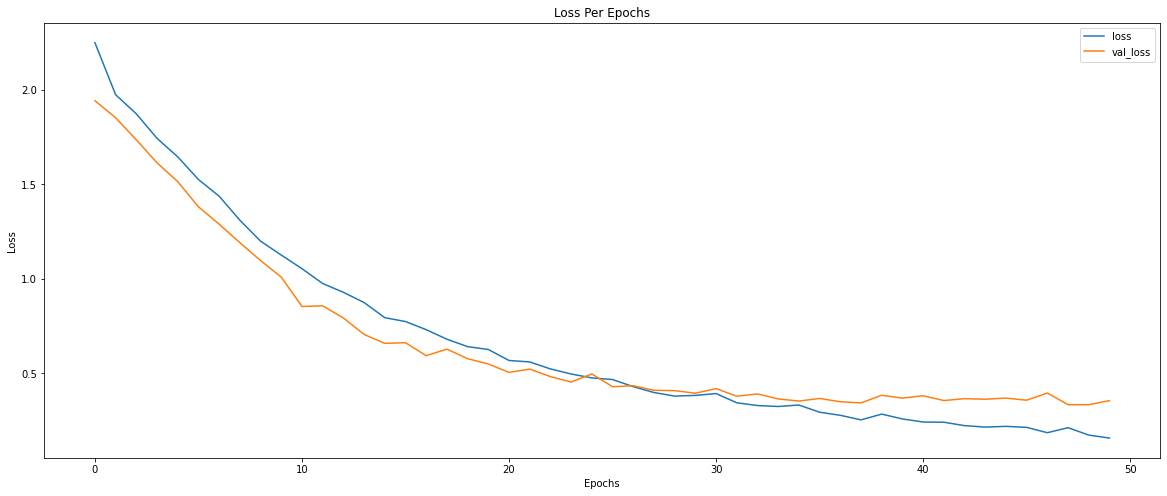

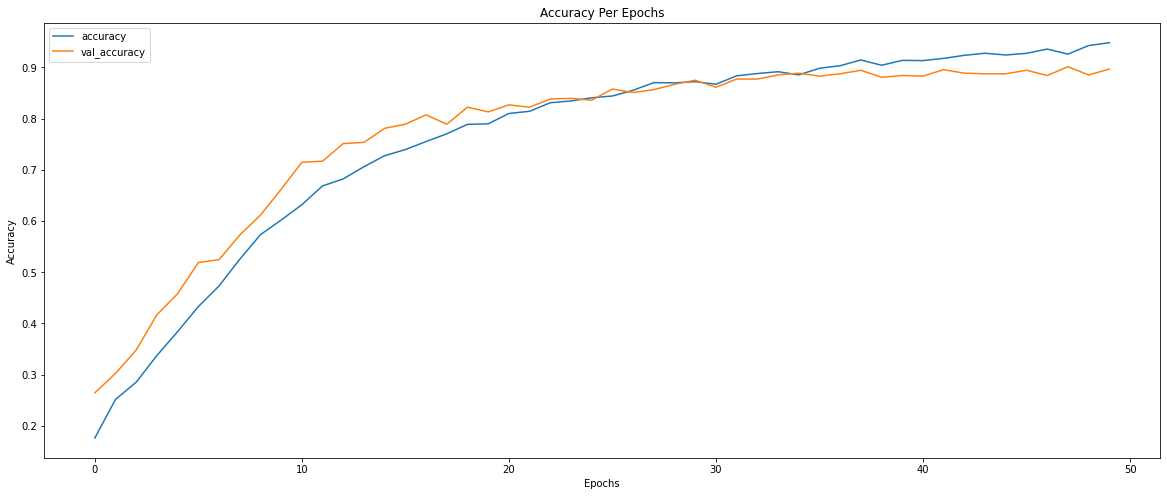

In [10]:
plt.figure(figsize=(20,8))
plt.plot(train_hist[['loss','val_loss']])
plt.legend(['loss','val_loss'])
plt.title('Loss Per Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.figure(figsize=(20,8))
plt.plot(train_hist[['accuracy','val_accuracy']])
plt.legend(['accuracy','val_accuracy'])
plt.title('Accuracy Per Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [11]:
model.evaluate(X_test , y_test)

28/28 [==============================] - 0s 7ms/step - loss: 0.3447 - accuracy: 0.9096


[0.34465572237968445, 0.9096109867095947]

In [12]:
# Make prediction on the reshaped sample
prediction_result = model.predict(X_test[789].reshape(1,64,64,1))

# Print the prediction result
prediction_result

array([[7.0481751e-06, 6.3960515e-06, 1.6453074e-02, 9.7502536e-01,
        1.9021581e-05, 9.4025876e-05, 1.9908455e-05, 1.3527082e-07,
        5.6771114e-03, 2.6978934e-03]], dtype=float32)

In [13]:
# Find the predicted class
predicted_class = prediction_result.argmax()
# Find the prediction probability
prediction_probability = prediction_result.max()

In [14]:
print(f"This image belongs to class {predicted_class} with {prediction_probability} probability %")

This image belongs to class 3 with 0.9750253558158875 probability %


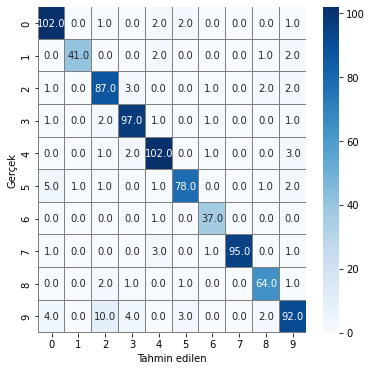

In [15]:
y_predicted = model.predict(X_test)
y_predicted_class = np.argmax(y_predicted, axis = 1)
matrix = confusion_matrix(y_test, y_predicted_class)

f,ax = plt.subplots(figsize=(6, 6))
sns.heatmap(matrix, annot=True, linewidths=0.01, cmap="Blues", linecolor="gray", fmt= '.1f', ax=ax)
plt.xlabel("Tahmin edilen")
plt.ylabel("Gerçek")
plt.show()

In [22]:
torch.save(Sequential, './CNNmodel_DLTR.pt')

In [20]:
model.save(path)